In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [7]:
import pandas as pd
train_data = pd.read_csv("C:\\Users\\pavit\\Downloads\\train.csv")
test_data = pd.read_csv("C:\\Users\\pavit\\Downloads\\test.csv")
data_w = train_data.copy()
data_w.columns = data_w.columns.str.replace(' ', '') 
data_w.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print("Skewness: %f" % abs(data_w['SalePrice']).skew())
print("Kurtosis: %f" % abs(data_w['SalePrice']).kurt())
print("Shapiro_Test t_value: %f" % shap_t)
print("Shapiro_Test p_value: %f" % shap_p)

Skewness: 1.882876
Kurtosis: 6.536282
Shapiro_Test t_value: 0.869671
Shapiro_Test p_value: 0.000000


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


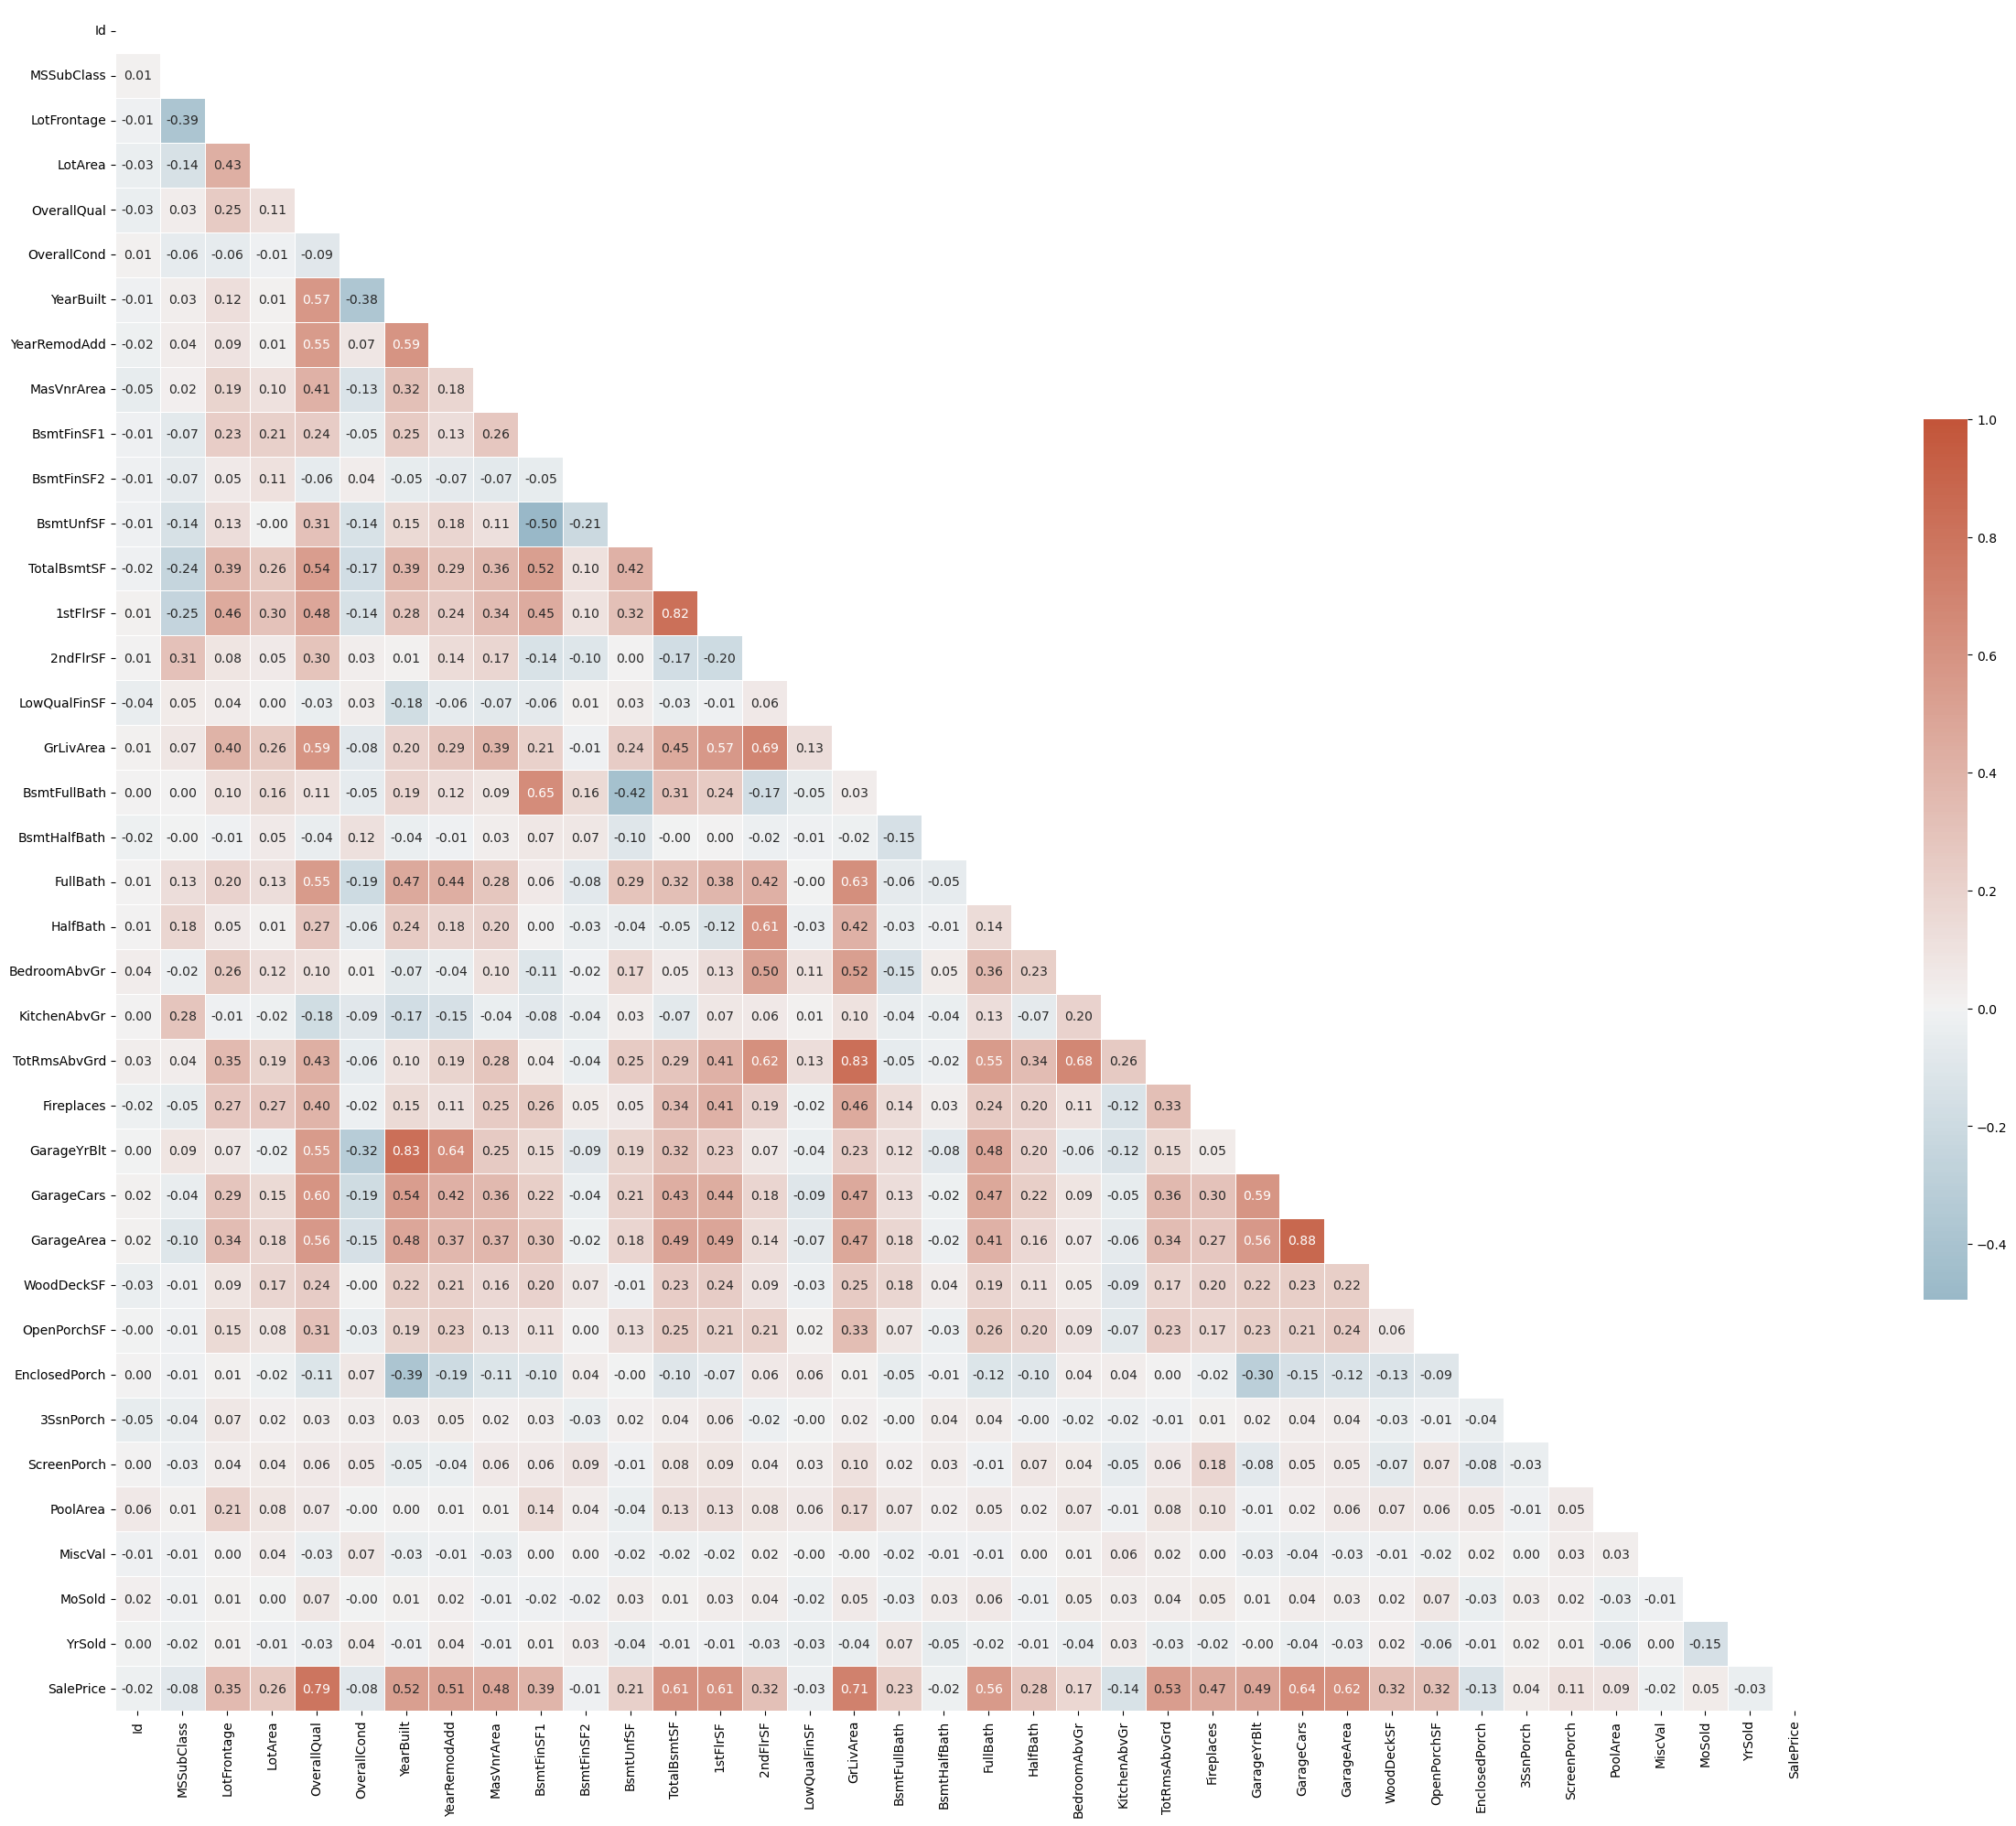

In [11]:
non_numeric_columns = data_w.select_dtypes(include=['object']).columns
print(non_numeric_columns)
numeric_data_w = data_w.drop(columns=non_numeric_columns)
numeric_data_w = data_w.select_dtypes(include=[np.number])
# numeric_data_w = data_w.select_dtypes(include=[np.number])
numeric_data_w = data_w.select_dtypes(include=[np.number])
f, ax = plt.subplots(figsize=(30, 25))
mat = numeric_data_w.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.show()

In [17]:
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [19]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']

X_train = train_data[features].values
y_train = train_data['SalePrice'].values
X_test = test_data[features].values

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train_split, y_train_split)

In [21]:
model_slope = model.coef_
model_intercept = model.intercept_
print('Slope:', model_slope)
print('Intercept:', model_intercept)
y_val_pred = model.predict(X_val_split)

Slope: [   101.73256593 -26704.0146758   30848.02847147   4611.65326359]
Intercept: 52830.65278836095


In [23]:
mae = mean_absolute_error(y_val_split, y_val_pred)
mse = mean_squared_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)
print(f"Validation Mean Absolute Error is: {mae}")
print(f"Validation Mean Squared Error is: {mse}")
print(f"Validation R-squared is: {r2}")

Validation Mean Absolute Error is: 36018.563138363446
Validation Mean Squared Error is: 2810942965.218066
Validation R-squared is: 0.6335301929422243


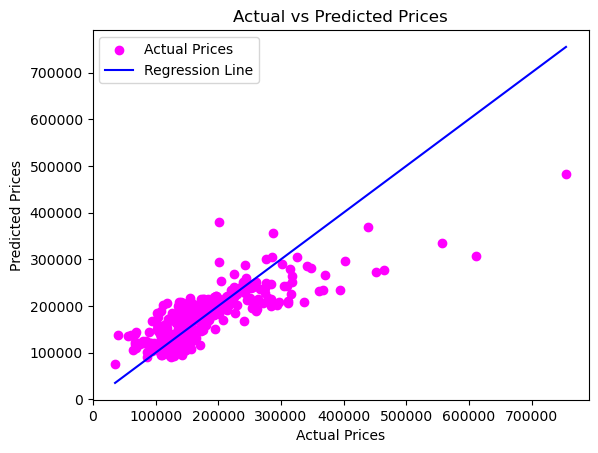

In [25]:
plt.scatter(y_val_split, y_val_pred, color='magenta', label='Actual Prices')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], color='blue', label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()